# IBM MACHINE LEARNING - PROJECT B 

## Forecasting Photovoltaic Generated Power - Regression Analysis

### 1 - General Information About the Dataset

**In solar power plants, it is important to keep tracking the produced power by solar panels to maintain the echo cycle, which consists of resource planning, delivery, storage, and automation. However, the energy yields of Photovoltaic (PV) are volatile due to the inconsistency in weather conditions such as humidity and cloud movement. The  unsteady power output makes the management of energy challenging. Thus, accurately predicting the power generated by PV plants is a strong asset that facilitates energy management in power plants.**

**datalink on GitHub: https://www.kaggle.com/datasets/stucom/solar-energy-power-generation-dataset**

### 2 - Features description 

1 - temperature_2_m_above_gnd:  Temperature 2 m above ground (°C).

2 - relative_humidity_2_m_above_gnd:  Humidity 2 m above ground (%).

3 - mean_sea_level_pressure_MSL: Mean sea level pressure (hPa).

4 - total_precipitation_sfc: Surface rain precipitation (mm).

5 - snowfall_amount_sfc: Surface amount of snowfall (mm).

6 - total_cloud_cover_sfc: Surface total cloud cover  (%).

7 - high_cloud_cover_high_cld_lay: High cloud cover (%).

8 - medium_cloud_cover_mid_cld_lay: Medium cloud cover (%).

9 - low_cloud_cover_low_cld_lay: low cloud cover (%).

10 - shortwave_radiation_backwards_sfc: Surface sun radiation (W/m2)

11 - wind_speed_10_m_above_gnd: Speed of wind 10 m above ground (m/s).

12 - wind_direction_10_m_above_gnd: Agnular measurement (degree).

13 - wind_speed_80_m_above_gnd: Speed of wind 80 m above ground (m/s).

14 - wind_direction_80_m_above_gnd: Angular measurement (degree).

15 - wind_speed_900_mb: Speed of wind 900 m above ground (m/s).

16 - wind_direction_900_mb: Angular measurement (degree).

17 - wind_gust_10_m_above_gnd: Speed of wind gust 10 m above ground (m/s).

18 - angle_of_incidence: Angular measurement (degree).

19 - zenith: Angular measurement (degree).

20 - azimuth: Angular measurement (degree).

21 - generated_power_kw: Total power (KW).             

In [1]:
# Import the necessary libraries for cleaning
import numpy as np # For linear algebra
import pandas as pd # For data frame manipulation
import seaborn as sns # For visualization I
import matplotlib.pyplot as plt # For visualization II
%matplotlib inline 

In [2]:
# Reading the data set
data = pd.read_csv('/Users/salahkaf/Desktop/PVpower.csv')

In [3]:
print("Data frame first three rows")
display(data.head(3))
print("")
print("----------------------------------------")
print("Data frame last thee rows")
display(data.tail(3))

Data frame first three rows


,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
0,2.17,31,1035.0,0.0,0.0,0.0,0,0,0,0.00,...,312.71,9.36,22.62,6.62,337.62,24.48,58.753108,83.237322,128.33543,454.10095
1,2.31,27,1035.1,0.0,0.0,0.0,0,0,0,1.78,...,294.78,5.99,32.74,4.61,321.34,21.96,45.408585,75.143041,139.65530,1411.99940
2,3.65,33,1035.4,0.0,0.0,0.0,0,0,0,108.58,...,270.00,3.89,56.31,3.76,286.70,14.04,32.848282,68.820648,152.53769,2214.84930



----------------------------------------
Data frame last thee rows


,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
4210,7.27,90,1026.3,0.1,0.0,100.0,73,100,100,113.92,...,2.29,8.71,352.87,7.95,354.81,22.32,25.249506,65.827032,197.33868,158.367780
4211,8.25,81,1025.5,0.0,0.0,100.0,74,66,100,186.90,...,11.31,6.29,13.24,5.94,14.04,15.48,36.361161,70.496313,211.30027,126.953060
4212,8.00,80,1025.3,0.0,0.0,100.0,100,100,100,172.66,...,12.72,12.07,17.35,11.38,18.43,16.20,48.452849,76.919574,223.04931,20.055031


In [4]:
print('Data Set dimensions',data.shape) # Number of rows and columns
print('')
data.info() #General summary about the columns

Data Set dimensions (4213, 21)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4213 entries, 0 to 4212
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   temperature_2_m_above_gnd          4213 non-null   float64
 1   relative_humidity_2_m_above_gnd    4213 non-null   int64  
 2   mean_sea_level_pressure_MSL        4213 non-null   float64
 3   total_precipitation_sfc            4213 non-null   float64
 4   snowfall_amount_sfc                4213 non-null   float64
 5   total_cloud_cover_sfc              4213 non-null   float64
 6   high_cloud_cover_high_cld_lay      4213 non-null   int64  
 7   medium_cloud_cover_mid_cld_lay     4213 non-null   int64  
 8   low_cloud_cover_low_cld_lay        4213 non-null   int64  
 9   shortwave_radiation_backwards_sfc  4213 non-null   float64
 10  wind_speed_10_m_above_gnd          4213 non-null   float64
 11  wind_direction_10_m_abov

In [5]:
data.describe().T #General statistics about the data set

,count,mean,std,min,25%,50%,75%,max
temperature_2_m_above_gnd,4213.0,15.068111,8.853677,-5.350000,8.390000,14.750000,21.290000,34.90000
relative_humidity_2_m_above_gnd,4213.0,51.361025,23.525864,7.000000,32.000000,48.000000,70.000000,100.00000
mean_sea_level_pressure_MSL,4213.0,1019.337812,7.022867,997.500000,1014.500000,1018.100000,1023.600000,1046.80000
total_precipitation_sfc,4213.0,0.031759,0.170212,0.000000,0.000000,0.000000,0.000000,3.20000
snowfall_amount_sfc,4213.0,0.002808,0.038015,0.000000,0.000000,0.000000,0.000000,1.68000
total_cloud_cover_sfc,4213.0,34.056990,42.843638,0.000000,0.000000,8.700000,100.000000,100.00000
high_cloud_cover_high_cld_lay,4213.0,14.458818,30.711707,0.000000,0.000000,0.000000,9.000000,100.00000
medium_cloud_cover_mid_cld_lay,4213.0,20.023499,36.387948,0.000000,0.000000,0.000000,10.000000,100.00000
low_cloud_cover_low_cld_lay,4213.0,21.373368,38.013885,0.000000,0.000000,0.000000,10.000000,100.00000
shortwave_radiation_backwards_sfc,4213.0,387.759036,278.459293,0.000000,142.400000,381.810000,599.860000,952.30000


In [6]:
data.isnull().sum() #Checking for missing values

temperature_2_m_above_gnd            0
relative_humidity_2_m_above_gnd      0
mean_sea_level_pressure_MSL          0
total_precipitation_sfc              0
snowfall_amount_sfc                  0
total_cloud_cover_sfc                0
high_cloud_cover_high_cld_lay        0
medium_cloud_cover_mid_cld_lay       0
low_cloud_cover_low_cld_lay          0
shortwave_radiation_backwards_sfc    0
wind_speed_10_m_above_gnd            0
wind_direction_10_m_above_gnd        0
wind_speed_80_m_above_gnd            0
wind_direction_80_m_above_gnd        0
wind_speed_900_mb                    0
wind_direction_900_mb                0
wind_gust_10_m_above_gnd             0
angle_of_incidence                   0
zenith                               0
azimuth                              0
generated_power_kw                   0
dtype: int64

<AxesSubplot:title={'center':'Correlation Map'}>

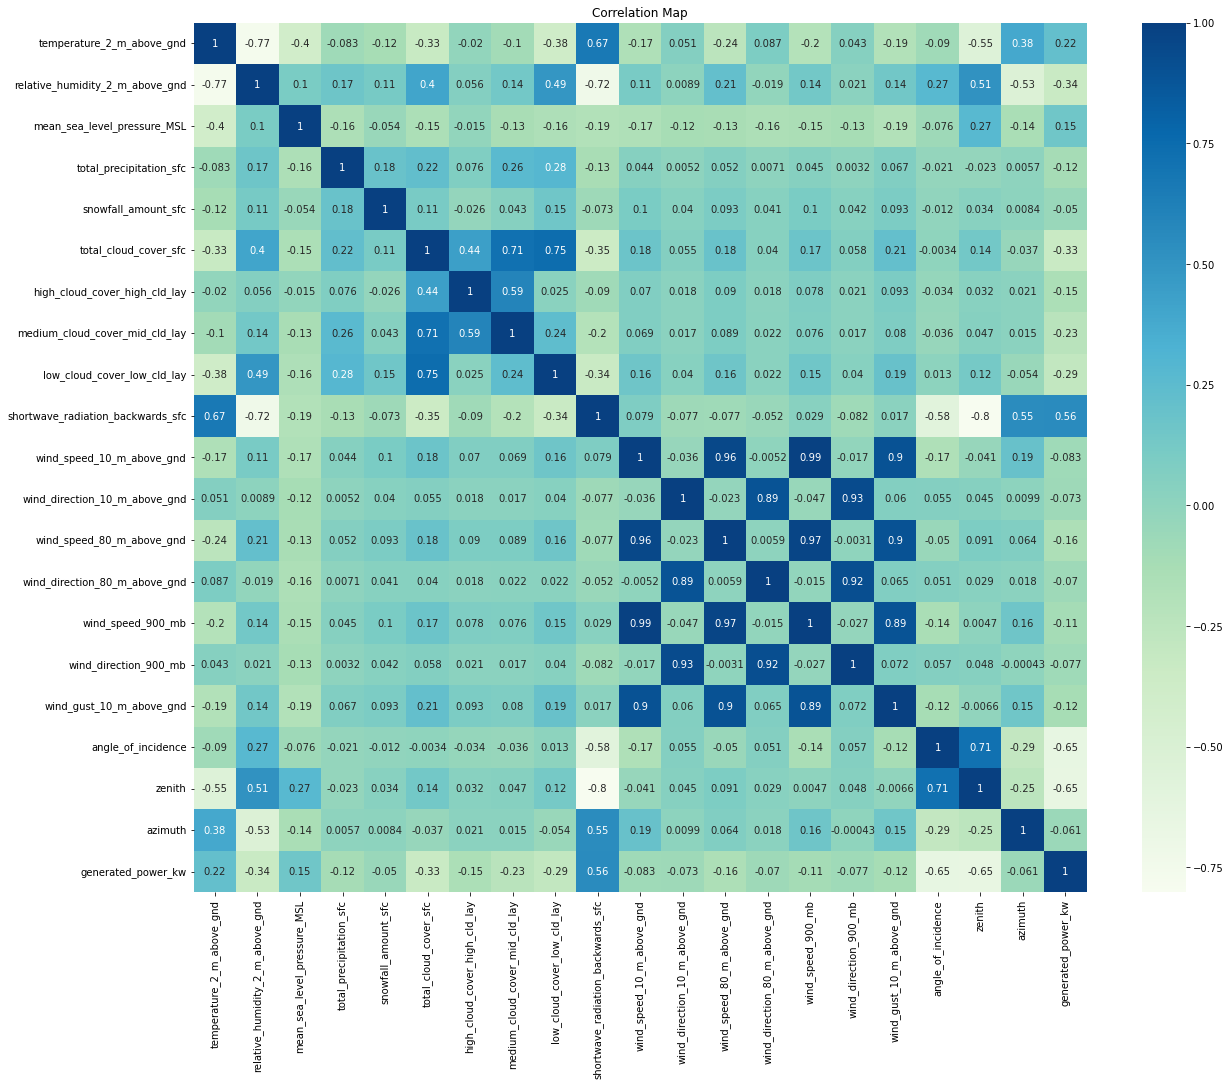

In [7]:
#Plotting Correlation map to identify attributes' relationships
corr = data.corr()
plt.figure(figsize=(20,16))
plt.title('Correlation Map')
sns.heatmap(corr, annot=True, cmap="GnBu")

### 3 -  Machine Learning - Regression

In [8]:
# Import the necessary libraries for ML
from sklearn.model_selection import train_test_split # for splitting the data 
from sklearn.preprocessing import PolynomialFeatures, StandardScaler # For feature transformation
from sklearn.model_selection import KFold # to find the best parameters
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet # for regression
from sklearn.ensemble import GradientBoostingRegressor # for regression
from sklearn.metrics import r2_score, mean_squared_error # for evaluation
from sklearn.pipeline import Pipeline # for ML automation
from sklearn.model_selection import GridSearchCV # to find the best parameters

In [9]:
# Mute the sklearn warning about regularization
import warnings
warnings.filterwarnings('ignore', module='sklearn')

In [10]:
# Define a root mean sequare error function
def rmse(ytrue, ypredicted):
    return np.sqrt(mean_squared_error(ytrue, ypredicted))

In [11]:
# Create X & y
X = data.drop('generated_power_kw', axis = 1) # Independent attributes
y = data['generated_power_kw'] # Targer variable

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7218)

In [13]:
s = StandardScaler() #Creating a standardscaler instance
X_train_s = s.fit_transform(X_train)
X_test_s = s.transform(X_test) # We apply standardscalar transformation also on the testing set, in order to let X_train and X_test have the same transformation

### A - Checking Results Without Hyperparameter Tuning

In [14]:
## Vanilla Linear Regression
lr = LinearRegression()
lr.fit(X_train_s, y_train) # We are fitting the standardscalar X_train data and the y_train
lr_pred = lr.predict(X_test_s)
print('r2 value is', r2_score(y_test, lr_pred))
print('rmse value is', rmse(y_test, lr_pred))

r2 value is 0.6930857758353701
rmse value is 518.1857630987897


In [15]:
# Lasso regression model
Lasso1 = Lasso() # initiate lasso object
Lasso1.fit(X_train_s, y_train)
Lasso1_pred = Lasso1.predict(X_test_s)
print('r2 value is', r2_score(y_test, Lasso1_pred))
print('rmse value is', rmse(y_test, Lasso1_pred))

r2 value is 0.6938731566211167
rmse value is 517.5206399113723


In [16]:
# Ridge regression model
Ridge1 = Ridge() # Initiate ridge object
Ridge1.fit(X_train_s, y_train)
Ridge1_pred = Ridge1.predict(X_test_s)
print('r2 value is', r2_score(y_test, Ridge1_pred))
print('rmse value is', rmse(y_test, Ridge1_pred))

r2 value is 0.6931831161583537
rmse value is 518.103583184011


In [17]:
# Gradient Boosting regression model
GBS1 = GradientBoostingRegressor()
GBS1.fit(X_train_s,y_train)
GBS1_pred = GBS1.predict(X_test_s)
print('r2 value is', r2_score(y_test, GBS1_pred))
print('rmse value is', rmse(y_test, GBS1_pred))

r2 value is 0.7756442574882763
rmse value is 443.0426779681326


In [18]:
## From above, we observe that the highest achieved score is ~ r2 of 0.77 by GBS.

### B - Checking Results With Hyperparameters Tuning

**We are using GridSearch Cross Validation to find the most suitable parameters.**

**We are also using pipelines, which according to IBM is "A pipeline contains a series of steps, where a step is ("name of step", actual_model). The "name of step" string is only used to help you identify which step you are on, and to allow you to specify parameters at that step."**

In [19]:
# initiate kf object >> 4 splits = 4 folds 
kf = KFold(shuffle=True, random_state=7218, n_splits = 4)

In [20]:
#Regular Linear Regression
estimator = Pipeline([
        ("polynomial_features", PolynomialFeatures()), # Firstly apply polynomial transformation
        ("scaler", StandardScaler()), # Then scaling
        ("linear_regression", LinearRegression())]) # Then fit the model

params = {
    'polynomial_features__degree': [1, 2, 3], # Two under scores (__) are used to specify the hyperparameters
}

grid = GridSearchCV(estimator, params, cv=kf)
grid.fit(X_train, y_train) # Passing the prescaled X_train as the pipeline will take care of scaling.
print(grid.best_score_, grid.best_params_)

0.7054403025509679 {'polynomial_features__degree': 1}


In [21]:
# Validation set results:

Vanilla_reg_preds = grid.predict(X_test)
Vanilla_reg_r2 = r2_score(y_test, Vanilla_reg_preds)
Vanilla_reg_rmse = rmse(y_test, Vanilla_reg_preds)
print('r2 value is', Vanilla_reg_r2)
print('rmse value is', Vanilla_reg_rmse)

r2 value is 0.6930857758353701
rmse value is 518.1857630987897


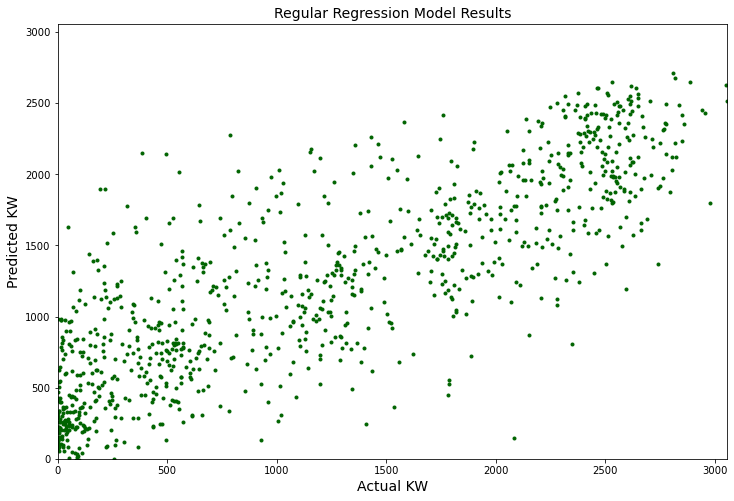

In [22]:
figure = plt.figure(figsize=(12,8))

ax = plt.axes()
ax.plot(y_test, Vanilla_reg_preds, 
         marker='o', ls='', ms=3.0, color = 'darkgreen')

lim = (0, y_test.max())

ax.set(xlabel='Actual KW', 
       ylabel='Predicted KW', 
       xlim=lim,
       ylim=lim)
plt.title('Regular Regression Model Results', fontsize=14)
ax.xaxis.label.set_size(14);
ax.yaxis.label.set_size(14);

In [23]:
# Lasso piepline

estimator = Pipeline([
        ("polynomial_features", PolynomialFeatures()),
        ("scaler", StandardScaler()),
        ("lasso_regression", Lasso())])

params = {
    'polynomial_features__degree': [1, 2, 3], # Two under scores (__) are used to specify the hyperparameters
    'lasso_regression__alpha': np.geomspace(0.01, 20, 10) 
}

grid = GridSearchCV(estimator, params, cv=kf)
grid.fit(X_train, y_train)
print(grid.best_score_, grid.best_params_)

0.7598618524360989 {'lasso_regression__alpha': 3.6937523489595185, 'polynomial_features__degree': 3}


In [24]:
# Validation set results:

Lasso_reg_preds = grid.predict(X_test)
Lasso_reg_r2 = r2_score(y_test, Lasso_reg_preds)
Lasso_reg_rmse = rmse(y_test, Lasso_reg_preds)

print('r2 value is', Lasso_reg_r2)
print('rmse value is', Lasso_reg_rmse)

r2 value is 0.7447069024808515
rmse value is 472.60303343662434


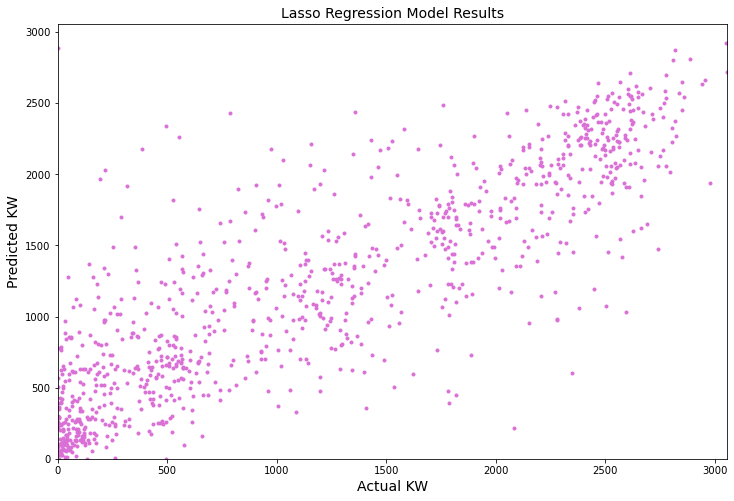

In [25]:
figure = plt.figure(figsize=(12,8))

ax = plt.axes()
ax.plot(y_test, Lasso_reg_preds, 
         marker='o', ls='', ms=3.0, color = 'orchid')

lim = (0, y_test.max())

ax.set(xlabel='Actual KW', 
       ylabel='Predicted KW', 
       xlim=lim,
       ylim=lim)
plt.title('Lasso Regression Model Results', fontsize=14)
ax.xaxis.label.set_size(14);
ax.yaxis.label.set_size(14);

In [26]:
# Ridge Pipeline

estimator = Pipeline([
        ("polynomial_features", PolynomialFeatures()),
        ("scaler", StandardScaler()),
        ("ridge_regression", Ridge())])

params = {
    'polynomial_features__degree': [1, 2, 3], # Two under scores (__) are used to specify the hyperparameters
    'ridge_regression__alpha': np.geomspace(0.1, 20, 10) 
}


grid = GridSearchCV(estimator, params, cv=kf)
grid.fit(X_train, y_train)
grid.best_score_, grid.best_params_


(0.7308792054284344,
 {'polynomial_features__degree': 2, 'ridge_regression__alpha': 0.1})

In [27]:
# Validation set results:

Ridge_reg_preds = grid.predict(X_test)
Ridge_reg_r2 = r2_score(y_test, Ridge_reg_preds)
Ridge_reg_rmse = rmse(y_test, Ridge_reg_preds)

print('r2 value is', Ridge_reg_r2)
print('rmse value is', Ridge_reg_rmse)

r2 value is 0.688110389543838
rmse value is 522.3690320511446


In [28]:
# The below code is used to verify the pipeline outcome

# model = Ridge(alpha = 0.1)

# # Create X & y
# X = data.drop('generated_power_kw', axis = 1) # Independent attributes
# y = data['generated_power_kw'] # Targer variable

# pf = PolynomialFeatures(degree=2, include_bias=False) #Create a polynomial features instance with degree '3'
# X_pf = pf.fit_transform(X) #Apply the transformation (we fit the x data frame into the pf instance)

# X_train, X_test, y_train, y_test = train_test_split(X_pf, y, test_size=0.25, random_state=7218)
# s = StandardScaler() #Creating a standardscaler instance
# X_train_s = s.fit_transform(X_train)
# X_test_s = s.transform(X_test) # We apply standardscalar transformation also on the testing set, in order to let X_train and X_test have the same transformation

# model.fit(X_train_s,y_train)
# r2_score(y_test, model.predict(X_test_s))
# rmse(y_test, model.predict(X_test_s))

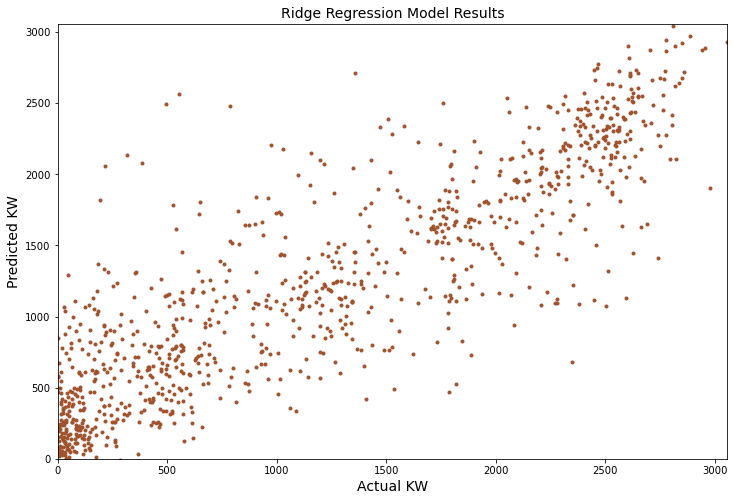

In [29]:
figure = plt.figure(figsize=(12,8))

ax = plt.axes()
ax.plot(y_test, Ridge_reg_preds, 
         marker='o', ls='', ms=3.0,color='sienna')

lim = (0, y_test.max())

ax.set(xlabel='Actual KW', 
       ylabel='Predicted KW', 
       xlim=lim,
       ylim=lim)
plt.title('Ridge Regression Model Results', fontsize=14)
ax.xaxis.label.set_size(14);
ax.yaxis.label.set_size(14);

In [30]:
%%time
# Elastic Net 
estimator = Pipeline([
        ("polynomial_features", PolynomialFeatures()),
        ("scaler", StandardScaler()),
        ("Elastic_Net", ElasticNet())])

params = {
    'polynomial_features__degree': [1, 2, 3], # Two under scores (__) are used to specify the hyperparameters
    'Elastic_Net__alpha': np.geomspace(0.1, 20, 10),
    'Elastic_Net__l1_ratio': np.linspace(0.1, 0.9, 5)}


grid = GridSearchCV(estimator, params, cv=kf)
grid.fit(X_train, y_train)
grid.best_score_, grid.best_params_


CPU times: user 17min 36s, sys: 19.7 s, total: 17min 56s
Wall time: 16min 40s


(0.7309444983822169,
 {'Elastic_Net__alpha': 3.4199518933533932,
  'Elastic_Net__l1_ratio': 0.9,
  'polynomial_features__degree': 3})

In [31]:
# Validation set results:

EN_reg_preds = grid.predict(X_test)
EN_reg_r2 = r2_score(y_test, EN_reg_preds)
EN_reg_rmse = rmse(y_test, EN_reg_preds)

print('r2 value is', EN_reg_r2)
print('rmse value is', EN_reg_rmse)

r2 value is 0.7238321940433066
rmse value is 491.5452382525725


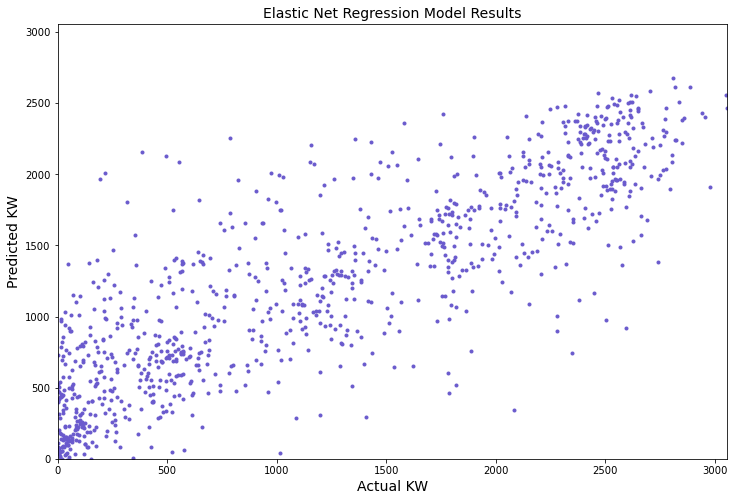

In [32]:
figure = plt.figure(figsize=(12,8))

ax = plt.axes()
ax.plot(y_test, EN_reg_preds, 
         marker='o', ls='', ms=3.0,color='slateblue')

lim = (0, y_test.max())

ax.set(xlabel='Actual KW', 
       ylabel='Predicted KW', 
       xlim=lim,
       ylim=lim)
plt.title('Elastic Net Regression Model Results', fontsize=14)
ax.xaxis.label.set_size(14);
ax.yaxis.label.set_size(14);

In [33]:
# As Graident Boosting consumes so much time. The only hyperparameter we are going to tune in GBS is max_depth.

estimator = Pipeline([("scaler", StandardScaler()),
                      ("GBS", GradientBoostingRegressor(max_depth=5))])

estimator.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('GBS', GradientBoostingRegressor(max_depth=5))])

In [34]:
# Validation set results:

GB_reg_preds = estimator.predict(X_test)

GB_reg_r2 = r2_score(y_test, GB_reg_preds)
GB_reg_rmse = rmse(y_test, GB_reg_preds)

print('r2 value is', GB_reg_r2)
print('rmse value is', GB_reg_rmse)

r2 value is 0.7931151199274791
rmse value is 425.44296281991865


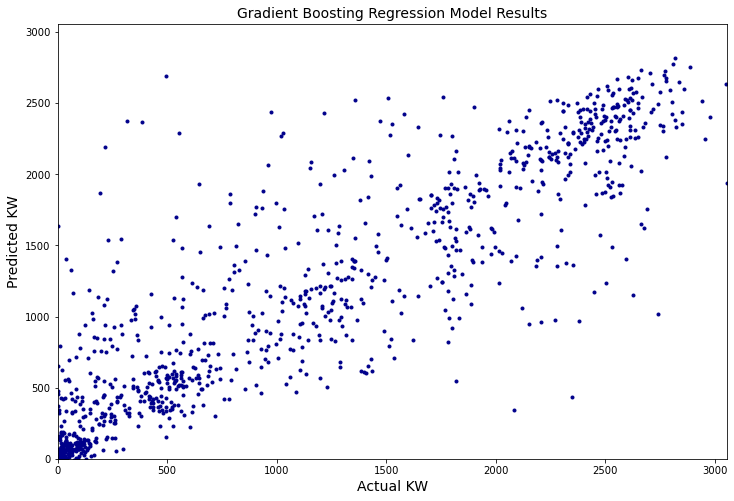

In [35]:
figure = plt.figure(figsize=(12,8))

ax = plt.axes()
ax.plot(y_test, GB_reg_preds, 
         marker='o', ls='', ms=3.0,color='Darkblue')

lim = (0, y_test.max())

ax.set(xlabel='Actual KW', 
       ylabel='Predicted KW', 
       xlim=lim,
       ylim=lim)
plt.title('Gradient Boosting Regression Model Results', fontsize=14)
ax.xaxis.label.set_size(14);
ax.yaxis.label.set_size(14);

In [37]:
rmse_vals = [Vanilla_reg_rmse, Lasso_reg_rmse, Ridge_reg_rmse, EN_reg_rmse, GB_reg_rmse]
R2_vals = [Vanilla_reg_r2, Lasso_reg_r2, Ridge_reg_r2, EN_reg_r2, GB_reg_r2] 

labels = ['Linear Regression', 'Lasso', 'Ridge', 'ElasticNet','Gradient Boosting Reg']
metric_df = pd.Series(rmse_vals, index=labels).to_frame()
metric_df.rename(columns={0: 'RMSE'}, inplace=1)
metric_df['R2'] = R2_vals
metric_df

,RMSE,R2
Linear Regression,518.185763,0.693086
Lasso,472.603033,0.744707
Ridge,522.369032,0.688110
ElasticNet,491.545238,0.723832
Gradient Boosting Reg,425.442963,0.793115
